#### **PROGRAMA QUE UTILIZA MACHING LEARNIN PARA CLASIFICAR LOS MANGOS MADUROS Y PODRIDOS**
---


Este programa ilustra el uso de las librerías skimage, pathlib, numpy y matplotlib, para cargar un dataset de imagenes, inspeccionar datos, graficar y corregir errores. El conjunto de datos tomado para este trabajo es de: https://www.kaggle.com/datasets/adrinbd/unripe-ripe-rotten-mango

Este conjunto de datos cuenta con una clasificacion de 3 estados del mango, maduro(ripe), inmaduro(unripe) y podrido(rotten) con sus respectivas imagenes para el entrenamiento del modelo, de este conjunto de datos solo se tendran en cuenta los estados maduros y podridos, se trabajara con las mascaras de los mangos, el proceso para obtener estas mascaras no se tendra en cuneta en este trabajo.

El objetivo de estos conjuntos de imagenes es ser capas de difinir si un mango esta maduro(ripe) o podrido(rotten), usando ese conjunto de imagenes para entrenar este modelo.

In [1]:

import matplotlib
import matplotlib.pyplot as plt

from pathlib import Path
import os

from skimage.data import page
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

import pandas as pd
import numpy as np
import skimage as ski
import statistics

from scipy.ndimage import binary_fill_holes
from skimage.morphology import remove_small_objects




Se creara la función obtener_mascaras(), la cual retornara una lista con las imagenes que estan dentro de una carpeta, recibiendo como parametro la ruta de dicha carpeta que contiene las imagenes, y en ella se validara que los archivos que se obtengan sean un formato valida de imagenes para este trabajo.

In [2]:
def obtener_imagenes(ruta_carpeta):
    """Devuelve una lista de imágenes normales y en escala de grises de la carpeta especificada con el respectivo nombre de la imgen."""
    imagenes = []
    cont = 0
    for archivo in os.listdir(ruta_carpeta):
        try:
            img = ski.io.imread(ruta_carpeta+"/"+archivo)
            img = ski.util.img_as_ubyte(img)
            gray_image = rgb2gray(img)
            imagenes.append([archivo,img,gray_image, ""])
        except Exception as e:
            cont = cont + 1

    return imagenes

In [3]:
def obtener_mask(ruta_carpeta, coleccion):
    """Devuelve una lista de imágenes normales y en escala de grises de la carpeta especificada con el respectivo nombre de la imgen."""
    imagenes = []
    cont = 0
    carpeta = os.listdir(ruta_carpeta)
    for i in coleccion:
      nombre_img = obtener_primera_palabra(i[0],".")
      #print(nombre_img)
      for archivo in carpeta:

        nombre_mask = obtener_primera_palabra(archivo,"_")
        #print(nombre_mask, "y",nombre_img)
        if nombre_img == nombre_mask:

          i[3] = np.load(ruta_carpeta+"/"+archivo)
          imagenes.append(i)
          break


    return imagenes

In [4]:
def obtener_primera_palabra(palabra, caracter):
    p = palabra.split(caracter)
    return p[0]

In [5]:
def intensity_table(grayValues):
    table = {}
    for ival in range(256):
        table['val_'+ str(ival)] = [np.count_nonzero(grayValues == ival)]

    df_table = pd.DataFrame.from_dict(table, orient='columns')
    return df_table

In [29]:
def hist2features(grayImg, mangoMask):
    #color = ski.util.img_as_ubyte(colorImg)
    gray = ski.util.img_as_ubyte(grayImg)
    #mango_mask = ski.util.invert(mangoMask)
    mango_mask = mangoMask

    masked_gray = gray * mango_mask
    plt.imshow(masked_gray, cmap = 'gray')
    plt.show()
    df_intensities = intensity_table(masked_gray)
    print(df_intensities)
    return df_intensities

In [70]:
def buscar_cadena(cadena_a_buscar, lista_cadenas):
    for cadena in lista_cadenas:
        if cadena == cadena_a_buscar:
            return True
    return False

In [7]:
ripe = obtener_imagenes("./ripe")
rotten = obtener_imagenes("./rotten")


In [9]:
ripe = obtener_mask("./ripe_masks",ripe)
rotten = obtener_mask("./rotten_masks",rotten)

In [82]:
list_mask_rotten_gray = ["img1027.jpg","img1060.jpg","img1066.jpg","img1079.jpg","img1088.jpg","img1138.jpg","img1147.jpg","img1161.jpg","img1354.jpg","img1511.jpeg","img1512.jpg","img1514.jpg","img1522.jpg","img1527.jpg","img1533.jpg","img1541.jpg","img1548.jpg","img1552.jpg","img1571.jpg","img1579.jpg","img1580.jpg","img1596.jpg","img1606.jpg","img1616.jpg","img1618.jpg","img1636.jpg","img1639.jpg","img1668.jpeg","img1669.jpg","img1672.jpg","img1677.jpg","img1679.jpg","img1682.jpg","img1686.jpg","img1687.jpg","img1694.jpg","img1703.jpg","img1704.jpg","img1706.jpg","img1707.jpg","img1721.jpg","img1740.jpg","img1741.jpg","img1742.jpg","img1743.jpg","img1744.jpg","img1746.jpg","img1747.jpg","img1748.jpg","img1751.jpg","img1752.jpg","img1753.jpg","img1754.jpg","img1755.jpg","img1758.jpg","img1760.jpg","img1761.jpg","img1768.jpg","img1770.jpg","img1772.jpg","img1773.jpg","img1778.jpg","img1779.jpg","img1780.jpg","img1781.jpg","img1789.jpg","img1790.jpg","img1791.jpg","img1793.jpg","img1794.jpg","img1795.jpg","img1796.jpg","img1798.jpg","img1799.jpg","img1803.jpg","img1822.jpg","img1853.jpg","img1854.jpg","img1855.jpg","img1856.jpg","img1857.jpg","img1858.jpg","img1859.jpg","img1860.jpg","img1861.jpg","img1862.jpg","img1863.jpg","img1864.jpg","img1865.jpg","img1866.jpg","img1867.jpg","img1868.jpg","img1869.jpg","img1870.jpeg","img1871.jpg","img1873.jpg","img1874.jpg","img1875.jpg","img1876.jpg","img1877.jpg","img1878.jpg","img1879.jpg","img1880.jpg","img1881.jpg","img1885.jpg","img1886.jpg","img1887.jpg","img1888.jpg","img1889.jpg","img1890.jpg","img1891.jpg","img1893.jpg","img1894.jpg","img1895.jpg","img1896.jpg","img1897.jpg","img1898.jpg","img1899.jpg","img1900.jpg","img1901.jpg","img1902.jpg","img1903.jpg","img1904.jpg","img1905.jpg","img1906.jpg","img1907.jpg","img1908.jpg","img1909.jpg","img1910.jpg","img1912.jpg","img1913.jpg","img1914.jpg","img1915.jpg","img1916.jpg","img1918.jpg","img1919.jpg","img1920.jpg","img1925.jpg","img1926.jpg","img1927.jpg","img1928.jpg","img1929.jpg","img1930.jpg","img1932.jpg","img1933.jpg","img1934.jpg","img1935.jpg","img1936.jpg","img1937.jpg","img1938.jpg","img1939.jpg","img1940.jpg","img1941.jpg","img1942.jpg","img1943.jpg","img1944.jpg","img1945.jpg","img1946.jpg","img1947.jpg","img1948.jpg","img1951.jpg","img1960.jpeg","img1961.jpg","img1972.jpg","img1980.jpg","img497.jpg","img499.jpg","img501.jpg","img502.jpg","img503.jpg","img504.jpg","img505.jpg","img507.jpg","img508.jpg","img509.jpg","img510.jpg","img511.jpg","img512.jpg","img513.jpg","img514.jpg","img515.jpg","img516.jpg","img517.jpg","img518.jpg","img524.jpg","img526.jpg","img527.jpg","img534.jpg","img538.jpg","img552.jpg","img554.jpg","img555.jpg","img556.jpg","img557.jpg","img558.jpg","img559.jpg","img560.jpg","img561.jpg","img562.jpg","img563.jpg","img564.jpg","img565.jpg","img566.jpg","img567.jpg","img568.jpg","img569.jpg","img570.jpg","img571.jpg","img572.jpg","img573.jpg","img574.jpg","img575.jpg","img576.jpg","img577.jpg","img578.jpg","img580.jpg","img581.jpg","img583.jpg","img584.jpg","img585.jpg","img586.jpg","img587.jpg","img588.jpg","img589.jpg","img590.jpg","img591.jpg","img592.jpg","img593.jpg","img594.jpg","img595.jpg","img596.jpg","img597.jpg","img598.jpg","img599.jpg","img600.jpg","img601.jpg","img602.jpg","img603.jpg","img604.jpg","img606.jpg","img607.jpg","img608.jpg","img609.jpg","img610.jpg","img611.jpg","img612.jpg","img613.jpg","img614.jpg","img616.jpg","img617.jpg","img618.jpg","img619.jpg","img620.jpg","img621.jpg","img622.jpg","img623.jpg","img624.jpg","img625.jpg","img626.jpg","img628.jpg","img629.jpg","img630.jpg","img631.jpg","img632.jpg","img633.jpg","img634.jpg","img635.jpg","img636.jpg","img637.jpg","img638.jpg","img640.jpg","img641.jpg","img642.jpg","img643.jpg","img645.jpg","img669.jpg","img672.jpg","img682.jpg","img690.jpg","img706.jpg","img711.jpg","img719.jpg","img740.jpg","img744.jpg","img766.jpg","img768.jpg","img784.jpg","img797.jpg","img823.jpg","img844.jpg","img872.jpg","img893.jpg","img899.jpg","img901.jpg","img936.jpg","img951.jpg","img968.jpg","img991.jpg"]
list_mask_ripe_gray = ["img0.jpg","img1.jpg","img10.jpg","img100.jpg","img101.jpg","img102.jpg","img103.jpg","img104.jpg","img105.jpg","img106.jpg","img107.jpg","img108.jpg","img109.jpg","img11.jpg","img110.jpg","img111.jpg","img112.jpg","img12.jpg","img13.jpg","img14.jpg","img15.jpg","img155.jpg","img16.jpg","img17.jpg","img18.jpg","img19.jpg","img192.jpg","img193.jpg","img198.jpg","img199.jpg","img20.jpg","img206.jpg","img21.jpg","img212.jpg","img22.jpg","img23.jpg","img24.jpg","img240.jpg","img241.jpg","img25.jpg","img255.jpg","img26.jpg","img278.jpg","img28.jpg","img29.jpg","img292.jpg","img293.jpg","img297.jpg","img298.jpg","img299.jpg","img3.jpg","img30.jpg","img300.jpg","img301.jpg","img302.jpg","img303.jpg","img305.jpg","img306.jpg","img307.jpg","img308.jpg","img309.jpg","img31.jpg","img310.jpg","img311.jpg","img312.jpg","img316.jpg","img317.jpg","img318.jpg","img319.jpg","img32.jpg","img321.jpg","img322.jpg","img323.jpg","img324.jpg","img325.jpg","img326.jpg","img327.jpg","img328.jpg","img329.jpg","img33.jpg","img330.jpg","img331.jpg","img332.jpg","img333.jpg","img334.jpg","img335.jpg","img336.jpg","img337.jpg","img338.jpg","img339.jpg","img34.jpg","img340.jpg","img341.jpg","img342.jpg","img343.jpg","img344.jpg","img345.jpg","img346.jpg","img347.jpg","img348.jpg","img349.jpg","img35.jpg","img350.jpg","img351.jpg","img353.jpg","img354.jpg","img355.jpg","img356.jpg","img357.jpg","img358.jpg","img359.jpg","img36.jpg","img360.jpg","img361.jpg","img362.jpg","img363.jpg","img364.jpg","img365.jpg","img366.jpg","img367.jpg","img369.jpg","img37.jpg","img370.jpg","img371.jpg","img372.jpg","img373.jpg","img374.jpg","img375.jpg","img376.jpg","img377.jpg","img379.jpg","img38.jpg","img382.jpg","img383.jpg","img384.jpg","img385.jpg","img386.jpg","img387.jpg","img388.jpg","img389.jpg","img39.jpg","img390.jpg","img393.jpg","img394.jpg","img395.jpg","img396.jpg","img397.jpg","img399.jpg","img4.jpg","img40.jpg","img401.jpg","img402.jpg","img403.jpg","img404.jpg","img405.jpg","img406.jpg","img407.jpg","img408.jpg","img409.jpg","img41.jpg","img410.jpg","img411.jpg","img412.jpg","img413.jpg","img414.jpg","img415.jpg","img416.jpg","img417.jpg","img418.jpg","img419.jpg","img42.jpg","img420.jpg","img421.jpg","img422.jpg","img423.jpg","img424.jpg","img425.jpg","img426.jpg","img427.jpg","img428.jpg","img429.jpg","img43.jpg","img430.jpg","img431.jpg","img433.jpg","img434.jpg","img44.jpg","img45.jpg","img46.jpg","img463.jpg","img464.jpg","img465.jpg","img466.jpg","img467.jpg","img468.jpg","img469.jpg","img47.jpg","img471.jpg","img472.jpg","img473.jpg","img475.jpg","img476.jpg","img477.jpg","img478.jpg","img479.jpg","img48.jpg","img482.jpg","img484.jpg","img485.jpg","img486.jpg","img487.jpg","img488.jpg","img49.jpg","img490.jpg","img491.jpg","img492.jpg","img493.jpg","img494.jpg","img496.jpg","img5.jpg","img50.jpg","img51.jpg","img52.jpg","img53.jpg","img54.jpg","img55.jpg","img56.jpg","img57.jpg","img58.jpg","img59.jpg","img6.jpg","img60.jpg","img61.jpg","img62.jpg","img63.jpg","img64.jpg","img65.jpg","img66.jpg","img67.jpg","img69.jpg","img7.jpg","img70.jpg","img71.jpg","img72.jpg","img73.jpg","img77.jpg","img78.jpg","img79.jpg","img8.jpg","img80.jpg","img81.jpg","img83.jpg","img84.jpg","img85.jpg","img86.jpg","img87.jpg","img88.jpg","img89.jpg","img9.jpg","img90.jpg","img91.jpg","img92.jpg","img93.jpg","img94.jpg","img95.jpg","img96.jpg","img97.jpg","img98.jpg","img99.jpg"]


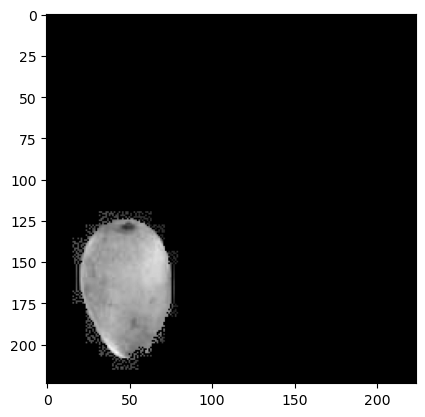

   val_0  val_1  val_2  val_3  val_4  val_5  val_6  val_7  val_8  val_9  ...  \
0  46074      0      0      0      0      0      0      0      0      0  ...   

   val_246  val_247  val_248  val_249  val_250  val_251  val_252  val_253  \
0        0        0        0        0        0        0        0        0   

   val_254  val_255  
0        0        0  

[1 rows x 256 columns]


In [92]:

l=len(ripe)
#print(l)
a =1
imagen2 = ripe[a]
"""cont=0
for i in range(l):
    if len(ripe[i][3].shape) == 3:
#        print('"',ripe[i][0],'"',",", sep="", end="")
        print("posicion=", i, "   imagen=", ripe[i][0])
        cont = cont +1
print(cont)"""

if buscar_cadena(imagen2[0], list_mask_ripe_gray):
    hist2features(imagen2[2],imagen2[3])
else:
    print("mascara a color")
